In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.environ["ALPACA_API_KEY"]
alpaca_secret_key = os.environ["ALPACA_SECRET_KEY"]

api = tradeapi.REST(
   alpaca_api_key,
   alpaca_secret_key,
   api_version = "v2"
)


## Part 1 - Personal Finance Planner

In [4]:
# Set monthly household income
monthly_income = 12000

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [7]:
# Fetch current BTC price
btc = requests.get(btc_url).json()
btc_price = btc["data"]["1"]["quotes"]["USD"]["price"]
# Fetch current ETH price
eth = requests.get(eth_url).json()
eth_price = eth["data"]["1027"]["quotes"]["USD"]["price"]
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $14081.95
The current value of your 5.3 ETH is $2007.90


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Current amount of shares
my_agg = 200
my_spy = 50

shares_data = {
        "shares":[200, 50]
}

tickers = ["AGG", "SPY"]

#Create the shares DataFrame
shares = pd.DataFrame(shares_data, index=tickers)
shares

,shares
AGG,200
SPY,50


In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [10]:
# Format current date as ISO format
start_date = pd.Timestamp("2019-10-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio =alpaca.get_barset(
    tickers, 
    timeframe, 
    start = start_date, 
    end = start_date
).df



# Pick AGG and SPY close prices
agg_close_price=float(df_portfolio["AGG"]["close"])
spy_close_price=float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")
df_portfolio.head()

Current AGG closing price: $112.91
Current SPY closing price: $296.01


AGG                                      SPY  \
                            open    high     low   close   volume    open   
2019-10-14 00:00:00-04:00  112.9  112.93  112.82  112.91  1442540  295.93   

                                                             
                             high     low   close    volume  
2019-10-14 00:00:00-04:00  296.67  295.57  296.01  32589599

In [11]:
# Compute the current value of shares
my_agg_value = agg_close_price * shares.loc["AGG"]["shares"]
my_spy_value = spy_close_price * shares.loc["SPY"]["shares"]


# Print current value of share
print(f"The current value of the {shares.loc['AGG']['shares']} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of the {shares.loc['SPY']['shares']} SPY shares is ${my_spy_value:0.2f}")

The current value of the 200 AGG shares is $22582.00
The current value of the 50 SPY shares is $14800.50


### Savings Health Analysis

In [12]:
# Create savings DataFrame
df_save = ['crypto', 'shares']

savings_value = [my_spy_value + my_agg_value, my_btc_value+my_eth_value]
df_save= pd.DataFrame(savings_value, index=df_save, columns=["Amount"])


# Display savings DataFrame
df_save

,Amount
crypto,37382.500
shares,16089.857


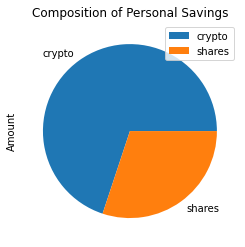

In [13]:
# Plot savings pie chart
df_save.plot.pie(y="Amount", title="Composition of Personal Savings")

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

total_savings = sum(savings_value)

# Calculate total amount of savings
if total_savings > emergency_fund:
    print("Congratulations, you have more than enough money in your emergency fund. Buy yourself something nice!")
elif total_savings == emergency_fund:
    print("Congratulations, you have reached your financial goal! Keep investing! ")
else:
    total_savings<emergency_fund
    print("Keep saving, you will get there!")


Congratulations, you have more than enough money in your emergency fund. Buy yourself something nice!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-14', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-14', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
df_savings = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Display sample data
df_savings.head()

AGG                                       \
                             open      high       low   close   volume   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.78  1497588   
2015-10-19 00:00:00-04:00  109.78  109.8950  109.6500  109.85  1289942   
2015-10-20 00:00:00-04:00  109.64  109.7800  109.5500  109.65  1672562   

                              SPY                                      
                             open    high       low   close    volume  
2015-10-14 00:00:00-04:00  200.18  200.87  198.9400  199.27  82856686  
2015-10-15 00:00:00-04:00  200.08  202.34  199.6400  202.33  96008389  
2015-10-16 00:00:00-04:00  202.83  203.29  201.9200  203.14  79323870  
2015-10-19 00:00:00-04:00  202.50  203.37  202.1300  203.33  61255929  
2015-10-20 00:00:00-04:00  202.85  203.84  202.5471  203.07  60081395

In [17]:
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_data = MCSimulation(
    portfolio_data = df_savings,
    weights=[.40, .60], 
    num_simulation = 500,
    num_trading_days = 252*30
)

In [19]:
# Printing the simulation input data
(MC_stock_data).portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.78  1497588   
2015-10-19 00:00:00-04:00  109.78  109.8950  109.6500  109.85  1289942   
2015-10-20 00:00:00-04:00  109.64  109.7800  109.5500  109.65  1672562   

                                           SPY                            \
                          daily_return    open    high       low   close   
2015-10-14 00:00:00-04:00          NaN  200.18  200.87  198.9400  199.27   
2015-10-15 00:00:00-04:00    -0.001272  200.08  202.34  199.6400  202.33   
2015-10-16 00:00:00-04:00    -0.001001  202.83  203.29  201.9200  203.14   
2015-10-19 00:00:00-04:00     0.000638  202.50  203.37  202.1300  203.33   
2015-10-20 00:00:00-04:00    -0.001821  202.85  203.84  202.5471  203.07   

                                                  
                             volume daily_return  
2015-10-14 00:00:00-04:00  82856686          NaN  
2015-10-15 00:00:00-04:00  96008389     0.015356  
2015-10-16 00:00:00-04:00  79323870     0.004003  
2015-10-19 00:00:00-04:00  61255929     0.000935  
2015-10-20 00:00:00-04:00  60081395    -0.001279

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_data.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001593,1.005241,1.009919,1.006978,0.994565,0.998453,1.009827,0.990878,1.007227,0.989989,...,0.993606,0.998044,0.997047,0.996928,0.991820,0.995140,0.993334,0.991249,0.995895,1.022332
2,1.006021,1.007589,1.016158,1.005032,0.980919,1.008679,1.000483,0.989101,1.001529,1.006808,...,0.978719,0.999748,0.994613,1.006778,0.992524,0.993502,0.997784,0.989719,0.998571,1.032591
3,1.008478,1.011935,1.012095,1.011947,0.991657,1.009631,0.993312,1.000379,1.000975,1.005642,...,0.980795,0.992665,0.988173,1.005844,0.980814,0.984353,0.997236,0.996903,0.979986,1.030065
4,1.011022,1.017280,1.013724,1.005133,0.981602,1.010923,0.990923,0.992082,0.988461,1.004139,...,0.974291,1.002228,0.985411,1.014078,0.993627,0.984420,0.997581,1.005535,0.981647,1.023082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.945271,18.680456,20.487303,2.927689,4.114691,2.863866,5.953660,20.006929,5.135146,36.926811,...,6.656312,6.067603,9.344986,18.024035,23.290396,9.246263,9.250225,3.760643,22.274142,25.535552
7557,2.951328,18.981447,20.313177,2.953593,4.114589,2.888338,5.945115,20.099237,5.128497,36.660408,...,6.639590,6.010357,9.364654,18.069875,23.641534,9.279962,9.288685,3.790055,22.239135,25.392029
7558,2.931317,18.911311,20.112127,2.915198,4.141602,2.916532,5.957320,20.107847,5.113535,36.627583,...,6.643167,5.987401,9.344077,18.235010,23.799710,9.261135,9.375733,3.792918,22.430148,25.237819
7559,2.929599,18.935033,19.922555,2.911683,4.174712,2.913727,5.940446,20.091763,5.108084,36.393441,...,6.593030,5.958135,9.288489,18.014746,23.944914,9.291769,9.371602,3.747604,22.482165,24.994879


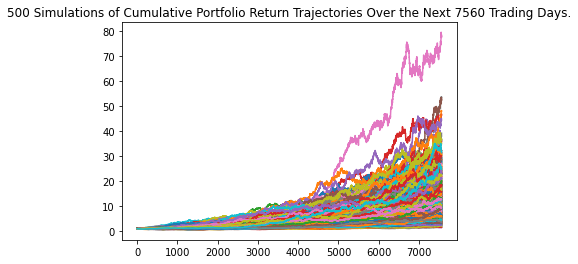

In [28]:
# Plot simulation outcomes
MC_stock_data.plot_simulation()

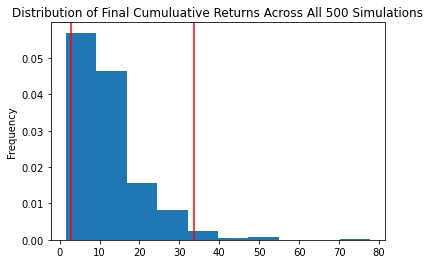

In [30]:
# Plot probability distribution and confidence intervals
dist_plot = MC_stock_data.plot_distribution()

### Retirement Analysis

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_stock_data.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             12.273595
std               8.775320
min               1.545999
25%               6.341032
50%               9.873347
75%              15.363134
max              77.759580
95% CI Lower      2.774221
95% CI Upper     33.595995
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [32]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $55484.42 and $671919.91


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [33]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $83226.62 and $1007879.86
